In [2]:
import numpy as np
import pandas as pd
from keras import models, layers

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import json
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('../data/datasets/training_data_noisy_small_track_symetric.csv')
print(f'{df.shape=}')
df.sample(5)

df.shape=(11880, 19)


,steering_angle,waypoint1_lat,waypoint1_lon,waypoint2_lat,waypoint2_lon,waypoint3_lat,waypoint3_lon,waypoint4_lat,waypoint4_lon,waypoint5_lat,waypoint5_lon,waypoint6_lat,waypoint6_lon,waypoint7_lat,waypoint7_lon,waypoint8_lat,waypoint8_lon,waypoint9_lat,waypoint9_lon
3276,-0.0,-0.476675,2.331752,-1.157654,5.662850,-1.838591,8.993910,-2.417471,12.341103,-1.606611,15.576086,0.970463,17.737736,4.237889,18.573010,7.604096,18.156507,10.753472,16.924684
9731,0.2,0.225190,-0.003556,3.989294,0.851890,7.338490,1.236702,10.795735,0.825432,12.801914,-1.785242,15.503458,-4.767787,17.845083,-6.735446,17.334942,-10.281635,20.472226,-11.970801
10144,0.1,0.577059,-1.275118,3.764176,-4.564288,3.758366,-7.036766,6.292992,-9.988937,8.159981,-12.633220,9.829217,-16.875926,11.679803,-17.958588,13.122151,-21.863217,12.482280,-24.568277
9596,0.2,0.933583,1.958806,2.146569,5.470097,5.675742,6.035631,8.938421,6.334553,13.076529,3.999010,15.511302,2.433862,16.430816,-0.154072,18.825342,-2.874543,21.375891,-5.952685
9280,-0.0,1.213156,1.159518,-1.631921,3.043243,-1.114321,6.332870,-2.266304,10.231802,-0.959169,13.570414,1.826917,15.385622,4.579873,16.370728,8.296899,16.270180,11.216274,14.616266


In [4]:
X = df.drop(columns=['steering_angle'])
y = df['steering_angle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9504, 18), (2376, 18), (9504,), (2376,))

In [5]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from datetime import datetime

model = Sequential([
    BatchNormalization(input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])


timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
checkpoint = ModelCheckpoint(f'../weights/best_NN_{timestamp}.h5', monitor='val_loss', save_best_only=True, mode='min')

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 18)               72        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               9728      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                        

In [6]:
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

Epoch 1/100
297/297 [==============================] - 5s 9ms/step - loss: 0.0075 - mae: 0.0619 - val_loss: 0.0035 - val_mae: 0.0420
Epoch 2/100
297/297 [==============================] - 3s 9ms/step - loss: 0.0051 - mae: 0.0507 - val_loss: 0.0033 - val_mae: 0.0403
Epoch 3/100
297/297 [==============================] - 2s 8ms/step - loss: 0.0049 - mae: 0.0493 - val_loss: 0.0034 - val_mae: 0.0423
Epoch 4/100
297/297 [==============================] - 2s 7ms/step - loss: 0.0044 - mae: 0.0471 - val_loss: 0.0026 - val_mae: 0.0386
Epoch 5/100
297/297 [==============================] - 2s 6ms/step - loss: 0.0044 - mae: 0.0462 - val_loss: 0.0028 - val_mae: 0.0371
Epoch 6/100
297/297 [==============================] - 2s 5ms/step - loss: 0.0039 - mae: 0.0439 - val_loss: 0.0024 - val_mae: 0.0361
Epoch 7/100
297/297 [==============================] - 2s 6ms/step - loss: 0.0037 - mae: 0.0428 - val_loss: 0.0032 - val_mae: 0.0412
Epoch 8/100
297/297 [==============================] - 3s 10ms/step -

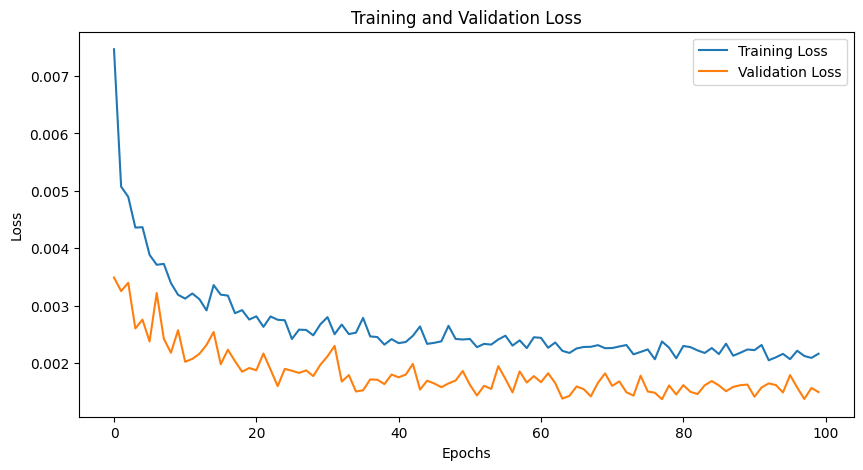

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

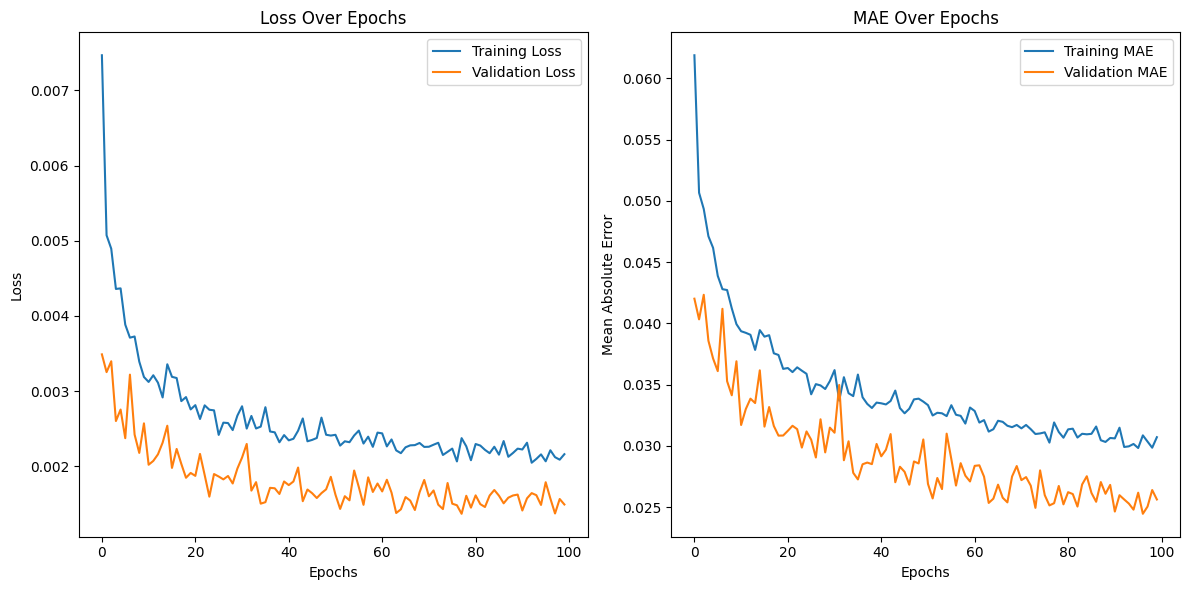

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Epochs')

plt.tight_layout()
plt.show()

In [9]:
model.load_weights(checkpoint.filepath)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R-squared (R2)"],
    "Value": [mse, mae, r2]
})

metrics_df

75/75 [==============================] - 0s 2ms/step


,Metric,Value
0,Mean Squared Error (MSE),0.001368
1,Mean Absolute Error (MAE),0.025332
2,R-squared (R2),0.935857


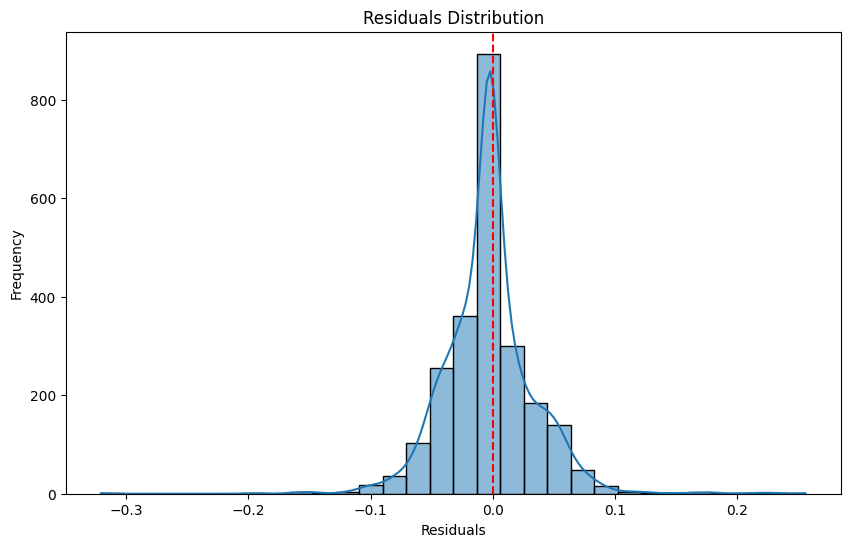

In [10]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

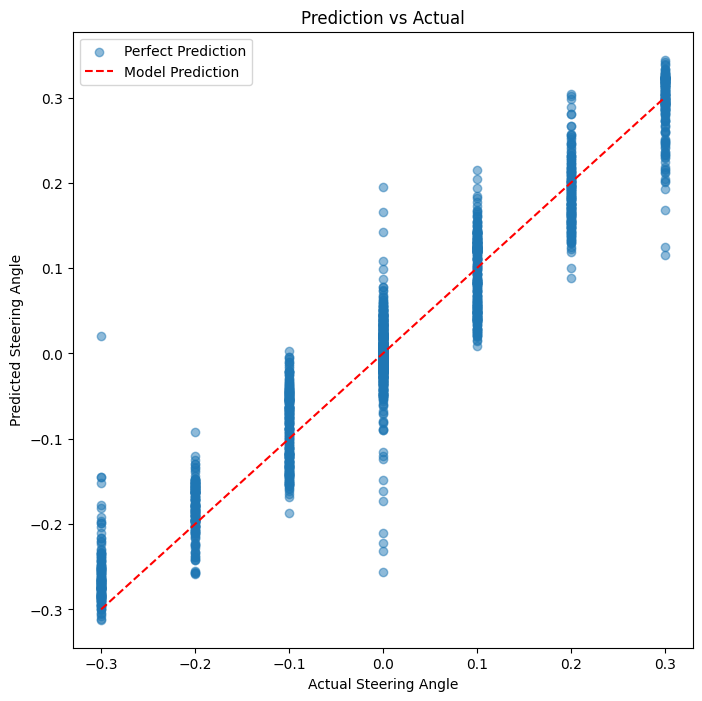

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Steering Angle')
plt.ylabel('Predicted Steering Angle')
plt.title('Prediction vs Actual')
plt.legend(['Perfect Prediction', 'Model Prediction'])
plt.show()

In [12]:
name = 'nn_512_256_128_64'
model_json = model.to_json()
with open(f'../models/{name}.json', 'w') as json_file:
    json.dump(json.loads(model_json), json_file, indent=4)

In [13]:
metadata = {
    "model_name": "nn_512_256_128_64",
    "model_path": f"../models/{name}.json",
    "timestamp": timestamp,
    "input_shape": list(X_train.shape[1:]),
    "output_shape": [1],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": ["mae"],
    "training": {
        "epochs": len(history.history['loss']),
        "batch_size": 32,
        "best_model_path": checkpoint.filepath,
        "final_training_loss": history.history['loss'][-1],
        "final_validation_loss": history.history['val_loss'][-1]
    },
    "evaluation": {
        "mse": mse,
        "mae": mae,
        "r2": r2
    }
}

try:
    with open("metadata.jsonl", "r+") as f:
        lines = f.readlines()
        if json.dumps(metadata) + "\n" not in lines:
            f.write(json.dumps(metadata) + "\n")
except FileNotFoundError:
    with open("metadata.jsonl", "w") as f:
        f.write(json.dumps(metadata) + "\n")

In [14]:
with open("metadata.jsonl", "r") as f:
    lines = f.readlines()

print(json.dumps(json.loads(lines[-1]), indent=4))

{
    "model_name": "nn_512_256_128_64",
    "model_path": "../models/nn_512_256_128_64.json",
    "timestamp": "20250601_140819",
    "input_shape": [
        18
    ],
    "output_shape": [
        1
    ],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": [
        "mae"
    ],
    "training": {
        "epochs": 100,
        "batch_size": 32,
        "best_model_path": "../weights/best_NN_20250601_140819.h5",
        "final_training_loss": 0.002160805743187666,
        "final_validation_loss": 0.0014916802756488323
    },
    "evaluation": {
        "mse": 0.0013678110796820507,
        "mae": 0.025332349787038116,
        "r2": 0.9358573693962217
    }
}
